In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# specify your path
file_path = './resources/CA_LosAngeles_2016_NREL_data.csv'

df = pd.read_csv(file_path)

In [27]:
# Convert Cloud Type to their classification/label names

# For Reference:
# cloud_type units: 'N/A': -15,
#   'Clear': 0, 'Probably Clear': 1, 'Fog': 2, 'Water': 3, 'Super-Cooled Water': 4, 'Mixed': 5, 'Opaque Ice': 6, 
#   'Cirrus': 7, 'Overlapping': 8, 'Overshooting': 9, 'Unknown': 10, 'Dust': 11, 'Smoke': 12
mapping_dict = {0: 'Clear', 1: 'Probably Clear', 2: 'Fog', 3: 'Water', 4: 'Super-Cooled Water', 5: 'Mixed', 6: 'Opaque Ice', 7: 'Cirrus', 8: 'Overlapping', 9: 'Overshooting', 10: 'Unknown', 11: 'Dust', 12: 'Smoke'}

df['Cloud Type'] = df['Cloud Type'].map(mapping_dict)
df['Cloud Type'] = df['Cloud Type'].replace(mapping_dict)


# Add a column for the actual datetime value of the timeseries
df['Timeseries Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Timeseries Datetime
0,2006,1,1,0,30,13.1,26,218,40,Cirrus,...,98.14,86.28,0.14,983,1.5,236,2.8,0.0000,0.0000,2006-01-01 00:30:00
1,2006,1,1,1,30,12.4,0,0,0,Cirrus,...,100.00,97.55,0.14,983,1.2,231,1.5,0.0000,0.0000,2006-01-01 01:30:00
2,2006,1,1,2,30,12.0,0,0,0,Overlapping,...,100.00,109.29,0.14,984,1.1,219,1.1,0.0000,0.0000,2006-01-01 02:30:00
3,2006,1,1,3,30,11.8,0,0,0,Cirrus,...,100.00,121.45,0.14,984,1.0,217,1.0,0.0000,0.0000,2006-01-01 03:30:00
4,2006,1,1,4,30,11.8,0,0,0,Cirrus,...,99.29,133.83,0.14,984,1.0,224,1.0,0.0000,0.0000,2006-01-01 04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2006,12,31,19,30,16.9,87,890,567,Probably Clear,...,38.16,57.43,0.14,991,1.0,242,1.9,31.7061,24.7961,2006-12-31 19:30:00
8756,2006,12,31,20,30,16.8,91,872,558,Fog,...,40.06,57.65,0.14,990,1.1,245,2.5,31.1671,24.3720,2006-12-31 20:30:00
8757,2006,12,31,21,30,15.9,92,822,486,Overlapping,...,44.40,61.28,0.14,990,1.2,250,2.9,22.9218,17.8893,2006-12-31 21:30:00
8758,2006,12,31,22,30,14.8,86,729,361,Cirrus,...,50.40,67.77,0.14,990,1.2,258,3.0,15.2396,11.8315,2006-12-31 22:30:00


In [28]:
# y axis
global_horizontal_irradiance_df = df['GHI']

# x axes
air_temperature_df = df['Temperature']
relative_humidity_df = df['Relative Humidity']
dew_point_df = df['Dew Point']
surface_albedo_df = df['Surface Albedo']
precipitable_water_df = df['Precipitable Water']
wind_speed_df = df['Wind Speed']
cloud_type_df = df['Cloud Type']

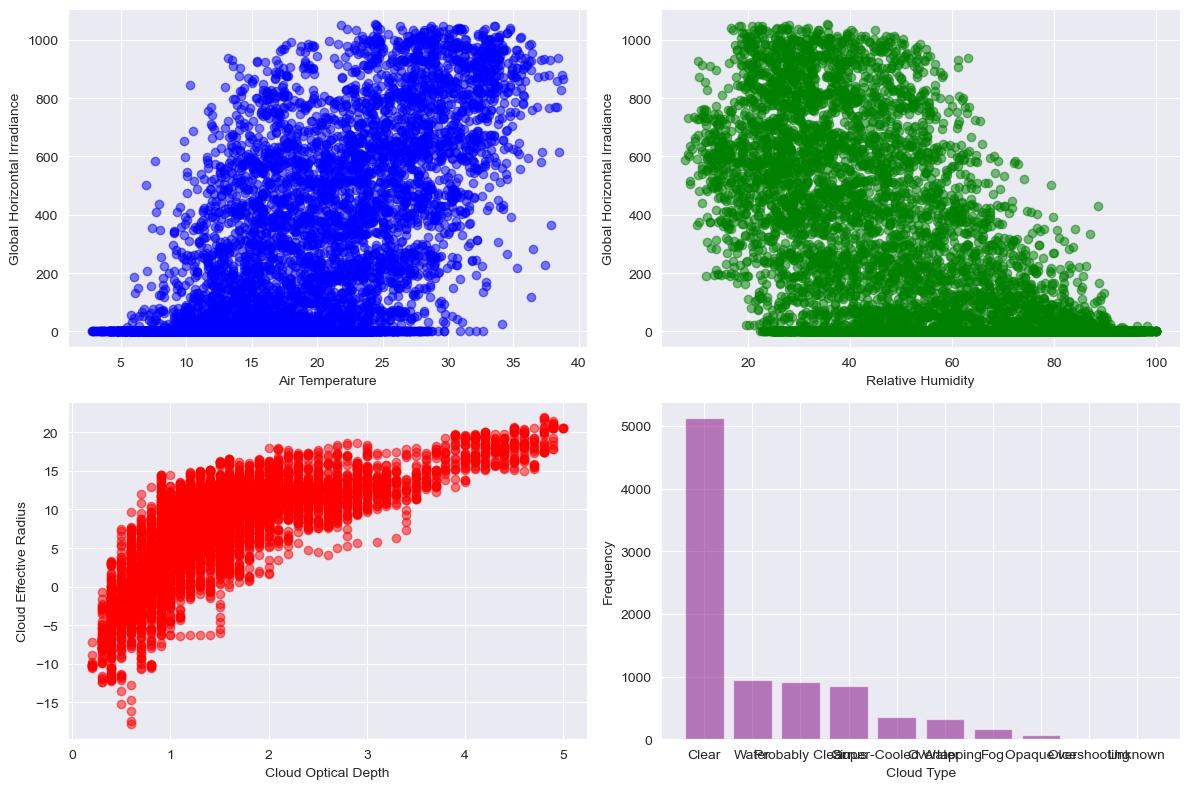

In [29]:
# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1 - Global Horizontal Irradiance vs. Air Temperature
axs[0, 0].scatter(air_temperature_df, global_horizontal_irradiance_df, color='blue', alpha=0.5)
axs[0, 0].set_xlabel('Air Temperature')
axs[0, 0].set_ylabel('Global Horizontal Irradiance')

# Plot 2 - Global Horizontal Irradiance vs. Relative Humidity
axs[0, 1].scatter(relative_humidity_df, global_horizontal_irradiance_df, color='green', alpha=0.5)
axs[0, 1].set_xlabel('Relative Humidity')
axs[0, 1].set_ylabel('Global Horizontal Irradiance')

# Plot 3 - Cloud Optical Depth vs. Cloud Effective Radius
axs[1, 0].scatter(precipitable_water_df, dew_point_df, color='red', alpha=0.5)
axs[1, 0].set_xlabel('Cloud Optical Depth')
axs[1, 0].set_ylabel('Cloud Effective Radius')

# Plot 4 - Cloud Type Distribution
cloud_type_counts = cloud_type_df.value_counts()
axs[1, 1].bar(cloud_type_counts.index, cloud_type_counts.values, color='purple', alpha=0.5)
axs[1, 1].set_xlabel('Cloud Type')
axs[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [35]:
# First consolidate all input time series into a single DataFrame based on index (assuming they share the same index)
df_exog = pd.concat(
    [air_temperature_df, relative_humidity_df, dew_point_df, surface_albedo_df, precipitable_water_df, wind_speed_df], axis=1)

# Append the target time series
df_endog = pd.concat([global_horizontal_irradiance_df], axis=1)

# Preprocessing: fill NaN values (if any)
# You might want to fill NaNs with a more sophisticated method based on your understanding of the data
# For a baseline solution, I am just filling with zeroes
df_exog = df_exog.fillna(0)
df_exog = df_exog.convert_dtypes()
df_exog = df_exog.apply(pd.to_numeric, errors='coerce')

df_endog = df_endog.fillna(0)
df_endog = df_endog.convert_dtypes()
df_exog = df_exog.apply(pd.to_numeric, errors='coerce')


# Split data into train and test sets
train_size = int(len(df_exog) * 0.8)
train_exog, test_exog = df[0:train_size], df[train_size:]

train_size = int(len(df_endog) * 0.8)
train_endog, test_endog = df[0:train_size], df[train_size:]

# Define a VARMAX model
model = VARMAX(endog=train_endog, exog=train_exog, order=(1, 1))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test))

# forecast is a pandas DataFrame that contains the forecasted values for all columns in the test set

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [23]:
df

,Temperature,Relative Humidity,Dew Point,Surface Albedo,Precipitable Water,Wind Speed,Cloud Type,GHI
0,13.1,98.14,12.8,0.14,1.5,2.8,7,19
1,12.4,100.00,12.4,0.14,1.2,1.5,7,0
2,12.0,100.00,12.0,0.14,1.1,1.1,8,0
3,11.8,100.00,11.8,0.14,1.0,1.0,7,0
4,11.8,99.29,11.7,0.14,1.0,1.0,7,0
...,...,...,...,...,...,...,...,...
8755,16.9,38.16,2.5,0.14,1.0,1.9,1,567
8756,16.8,40.06,3.1,0.14,1.1,2.5,2,558
8757,15.9,44.40,3.8,0.14,1.2,2.9,8,419
8758,14.8,50.40,4.6,0.14,1.2,3.0,7,292
